# Project 3: Credit Card Default Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# % matplotlib inline
from sklearn import datasets, model_selection
from sklearn import linear_model

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)

In [13]:
X1, X2, Y1, Y2 = model_selection.train_test_split(X, Y, train_size=0.75)

In [14]:
lm_lr = linear_model.LogisticRegression()
lm_lr.fit(X1, Y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
def plotDecisionBoundary(estimator, data, label):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    test_x = np.array([x1 for x1 in zip(xx.ravel(), yy.ravel())])
    test_y = estimator.predict_proba(test_x)

    plt.contourf(xx, yy, test_y[:,1].reshape(xx.shape), alpha=0.3)
    plt.scatter(data[:,0], data[:,1], c=label)

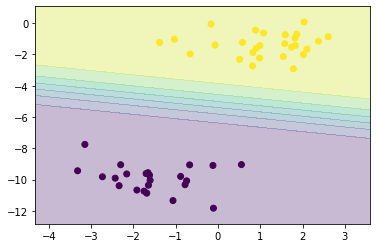

In [16]:
plotDecisionBoundary(lm_lr, X2, Y2)

#### 2. Following you will need to solve a Credit Card Default Detection Case

* Credit Card Default
    * To default is to fail to make a payment on a debt by the due date. If this happens with a credit card, creditors might raise interest rates to the default (or penalty rate) or decrease the line of credit. In case of serious delinquency, the card issuer can even take legal action to enforce payment or to garnish wages.

* Objective
    * Our objective for this project is, given the data set, we are going to build a machine learning model to predict whether a credit card is going to default

**Data Description:**

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**X12- X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; 

**X19** = amount paid in August, 2015; 

**X23** = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the credit card is default (1) or not (0).

This is a real problem to classify multi-feature data into two groups.




# Objective
* In this project, we are going to predict whether a credit card would be default or not. It's a classification problem where the label set is imbalanced since most of the credit cards are normal and only a few of them are default. For this project, we can not only have the chance to train a powerful classification model, but also tackle on the very important problem we might encounter in the future.

## Steps:
1. Perform feature engineering to the dataset the way you see fit.
2. Choose a classifier you like to make prediction
3. Keep in mind that the labels in target variable is imbalanced and figure out a way to deal with that problem

**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
5.	Choose the proper method to train the model.
6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.

Load data, select categorical and continuous variables

In [17]:
df = pd.read_csv("raw_data.csv")

In [19]:
# Check Nan values 
df.isna().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [26]:
# Check if values make sense
cols = df.columns.drop(['id', 'X1'])
for col in cols:
    print(df[col].value_counts())

2    15169
1     9831
Name: X2, dtype: int64
2    11686
1     8822
3     4100
5      229
4      106
6       45
0       12
Name: X3, dtype: int64
2    13331
1    11358
3      270
0       41
Name: X4, dtype: int64
29    1328
27    1228
28    1193
30    1152
26    1045
31    1002
34     984
25     978
33     966
32     963
24     961
36     930
35     919
37     875
39     787
38     786
23     781
40     704
41     681
42     645
43     580
44     577
45     504
46     486
22     466
47     419
48     387
49     386
50     338
51     291
53     270
52     253
54     200
55     168
56     145
58     107
57     102
59      73
60      58
21      54
61      50
62      35
63      26
66      23
64      23
65      21
67      13
69      13
70       8
68       4
73       4
72       3
71       2
74       1
75       1
79       1
Name: X5, dtype: int64
 0    12300
-1     4752
 1     3083
-2     2293
 2     2194
 3      268
 4       57
 5       21
 8       15
 6        9
 7        8
Name: X6, dtype: 

In [27]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
id     25000 non-null int64
X1     25000 non-null int64
X2     25000 non-null int64
X3     25000 non-null int64
X4     25000 non-null int64
X5     25000 non-null int64
X6     25000 non-null int64
X7     25000 non-null int64
X8     25000 non-null int64
X9     25000 non-null int64
X10    25000 non-null int64
X11    25000 non-null int64
X12    25000 non-null int64
X13    25000 non-null int64
X14    25000 non-null int64
X15    25000 non-null int64
X16    25000 non-null int64
X17    25000 non-null int64
X18    25000 non-null int64
X19    25000 non-null int64
X20    25000 non-null int64
X21    25000 non-null int64
X22    25000 non-null int64
X23    25000 non-null int64
Y      25000 non-null int64
dtypes: int64(25)
memory usage: 4.8 MB


In [29]:
# Identify categorical variables and encode 
from sklearn.preprocessing import OneHotEncoder
cat_col = ['X3', 'X4']
df_drop = df.drop(cat_col, axis=1).copy()
enc = OneHotEncoder(handle_unknown='ignore')
for i in cat_col:
    enc_df = pd.DataFrame(enc.fit_transform(df[[i]]).toarray())
    enc_df = enc_df.add_prefix(i)
    # merge with main df on key values
    df_drop = df_drop.join(enc_df)

In [30]:
df_drop.columns

Index(['id', 'X1', 'X2', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'Y', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X40',
       'X41', 'X42', 'X43'],
      dtype='object')

In [32]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 34 columns):
id     25000 non-null int64
X1     25000 non-null int64
X2     25000 non-null int64
X5     25000 non-null int64
X6     25000 non-null int64
X7     25000 non-null int64
X8     25000 non-null int64
X9     25000 non-null int64
X10    25000 non-null int64
X11    25000 non-null int64
X12    25000 non-null int64
X13    25000 non-null int64
X14    25000 non-null int64
X15    25000 non-null int64
X16    25000 non-null int64
X17    25000 non-null int64
X18    25000 non-null int64
X19    25000 non-null int64
X20    25000 non-null int64
X21    25000 non-null int64
X22    25000 non-null int64
X23    25000 non-null int64
Y      25000 non-null int64
X30    25000 non-null float64
X31    25000 non-null float64
X32    25000 non-null float64
X33    25000 non-null float64
X34    25000 non-null float64
X35    25000 non-null float64
X36    25000 non-null float64
X40    25000 non-null float64
X41    

Check if features have linear relationship between each other.

In [36]:
# Check linear relationship 
corr_tab = df_drop.select_dtypes(
    include=['int64', 'float64']
).corr().abs().unstack().to_frame().reset_index().rename(columns={0: "correlation"})
corr_tab_high = corr_tab[
    (corr_tab['correlation'] > 0.9) & (corr_tab['correlation'] != 1)
].sort_values(by='correlation', ascending=False) 

In [37]:
corr_tab_high # drop ['X41', 'X12', 'X16', 'X15', 'X14']

,level_0,level_1,correlation
1086,X41,X42,0.975274
1119,X42,X41,0.975274
351,X12,X13,0.953280
384,X13,X12,0.953280
491,X16,X17,0.945379
524,X17,X16,0.945379
456,X15,X16,0.936712
489,X16,X15,0.936712
386,X13,X14,0.926157
419,X14,X13,0.926157


In [42]:
df_final = df_drop.drop(['X41', 'X12', 'X16', 'X15', 'X14', 'id'], axis = 1)

In [43]:
df_final.columns

Index(['X1', 'X2', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X13', 'X17',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X40', 'X42', 'X43'],
      dtype='object')

Resampling

In [59]:
from sklearn.utils import resample
# Separate majority and minority classes 
# 0    19452
# 1     5548
df_majority = df_final[df_final.Y==0]
df_minority = df_final[df_final.Y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=19452,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Y.value_counts()
# 1    576
# 0    576

1    19452
0    19452
Name: Y, dtype: int64

In [60]:
y = df_upsampled['Y']
X = df_upsampled.drop('Y', axis=1)

Training Models

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    n_estimators=200,
    max_features="sqrt",
    class_weight="balanced"
)

In [63]:
forest_clf.fit(X_train, y_train.values.ravel())
y_pred = forest_clf.predict(X_test)
print(recall_score(y_test, y_pred, average=None))

[0.89313573 0.94929227]


In [68]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    forest_clf, X, y, cv=5, scoring='recall')
scores

array([0.97634961, 0.96760925, 0.96453354, 0.96453354, 0.96683805])

In [64]:
# Logistic 
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(class_weight="balanced", random_state=42)

In [66]:
logisticRegr.fit(X_train, y_train.values.ravel())
y_pred = logisticRegr.predict(X_test)
print(recall_score(y_test, y_pred, average=None))

[0.50124805 0.71317468]


Make submission file

In [70]:
y_submission = forest_clf.predict(X)

In [75]:
import numpy as np
np.savetxt("submission_ol.csv", y_submission, delimiter=",")